Let us see the columns description
age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable

## Our Task is To perform EDA and predict if a person is prone to a heart attack or not.

In [152]:
## Lets us import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("heart.csv")

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
##Shape pf dataset
df.shape

(303, 14)

In [9]:
##Dataset description
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
##Lets check the null values
df.isnull().sum()
###There are no null values in our dataset

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [16]:
#Lets check the unique values in our dataset
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [18]:
##Lets check the data types of our columns
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

[Text(0.5, 0, 'sex'), Text(0, 0.5, 'count')]

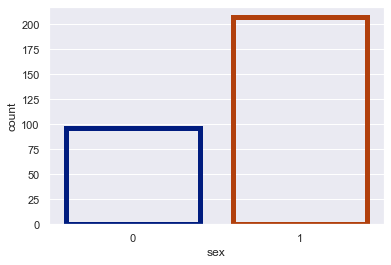

In [115]:
## Univariate analysis
ax = sns.countplot(x="sex", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set(xlabel='sex', ylabel='count')
### The count of male is more in out dataset

[Text(0.5, 0, 'exng'), Text(0, 0.5, 'count')]

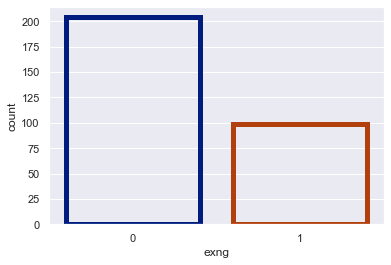

In [105]:
ax = sns.countplot(x="exng", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 2))
ax.set(xlabel='exng', ylabel='count')

(array([ 1.,  0.,  6.,  5.,  7., 26., 19., 19., 12., 25., 32., 28., 44.,
        19., 19., 24.,  7.,  7.,  1.,  2.]),
 array([29. , 31.4, 33.8, 36.2, 38.6, 41. , 43.4, 45.8, 48.2, 50.6, 53. ,
        55.4, 57.8, 60.2, 62.6, 65. , 67.4, 69.8, 72.2, 74.6, 77. ]),
 [<matplotlib.patches.Polygon at 0x2a00e258fc8>])

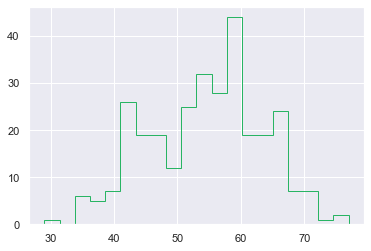

In [99]:
# Lets plot age (Continous variable)
plt.hist(x='age',bins=20,histtype='step',color='#28B463',data=df)
### Our dataset contains age group between 40-70

(array([ 2.,  8., 10., 32., 45., 22., 52., 22., 45., 12., 24.,  3., 11.,
         2.,  5.,  3.,  3.,  0.,  1.,  1.]),
 array([ 94. ,  99.3, 104.6, 109.9, 115.2, 120.5, 125.8, 131.1, 136.4,
        141.7, 147. , 152.3, 157.6, 162.9, 168.2, 173.5, 178.8, 184.1,
        189.4, 194.7, 200. ]),
 <BarContainer object of 20 artists>)

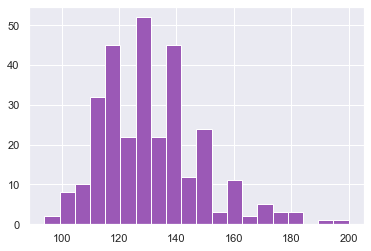

In [102]:
## trtbps plotting
plt.hist(x='trtbps',bins=20,histtype='barstacked',color='#9B59B6',data=df)

(array([ 3.,  9., 20., 53., 55., 51., 42., 27., 24., 11.,  3.,  0.,  3.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([126. , 147.9, 169.8, 191.7, 213.6, 235.5, 257.4, 279.3, 301.2,
        323.1, 345. , 366.9, 388.8, 410.7, 432.6, 454.5, 476.4, 498.3,
        520.2, 542.1, 564. ]),
 [<matplotlib.patches.Polygon at 0x2a00e4eb588>])

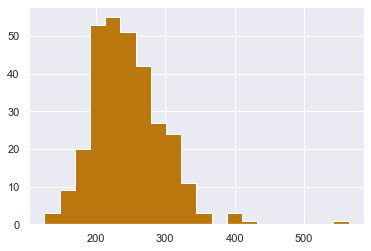

In [104]:
##chol plotting
plt.hist(x='chol',bins=20,histtype='stepfilled',color='#B9770E',data=df)
## We can observe outliers as well

[Text(0.5, 0, 'caa'), Text(0, 0.5, 'count')]

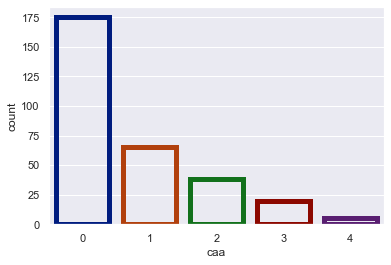

In [112]:
ax = sns.countplot(x="caa", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 5))
ax.set(xlabel='caa', ylabel='count')

[Text(0.5, 0, 'cp'), Text(0, 0.5, 'count')]

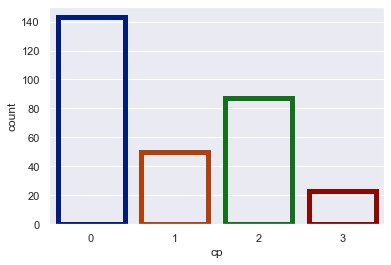

In [113]:
ax = sns.countplot(x="cp", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 4))
ax.set(xlabel='cp', ylabel='count')

[Text(0.5, 0, 'restecg'), Text(0, 0.5, 'count')]

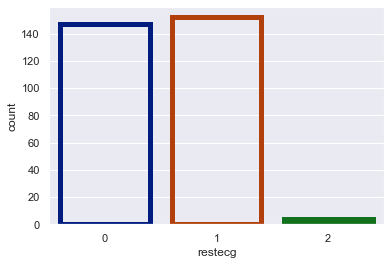

In [117]:
ax = sns.countplot(x="restecg", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set(xlabel='restecg', ylabel='count')

(array([121.,  28.,  17.,  33.,  19.,  21.,  15.,   9.,   8.,  12.,   6.,
          5.,   4.,   2.,   1.,   0.,   0.,   0.,   1.,   1.]),
 array([0.  , 0.31, 0.62, 0.93, 1.24, 1.55, 1.86, 2.17, 2.48, 2.79, 3.1 ,
        3.41, 3.72, 4.03, 4.34, 4.65, 4.96, 5.27, 5.58, 5.89, 6.2 ]),
 <BarContainer object of 20 artists>)

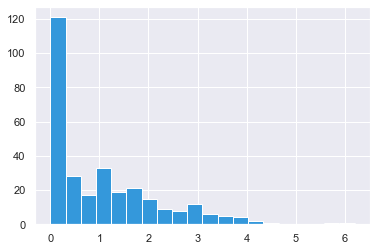

In [121]:
plt.hist(x='oldpeak',bins=20,color='#3498DB',data=df)

In [127]:
### Correlation
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


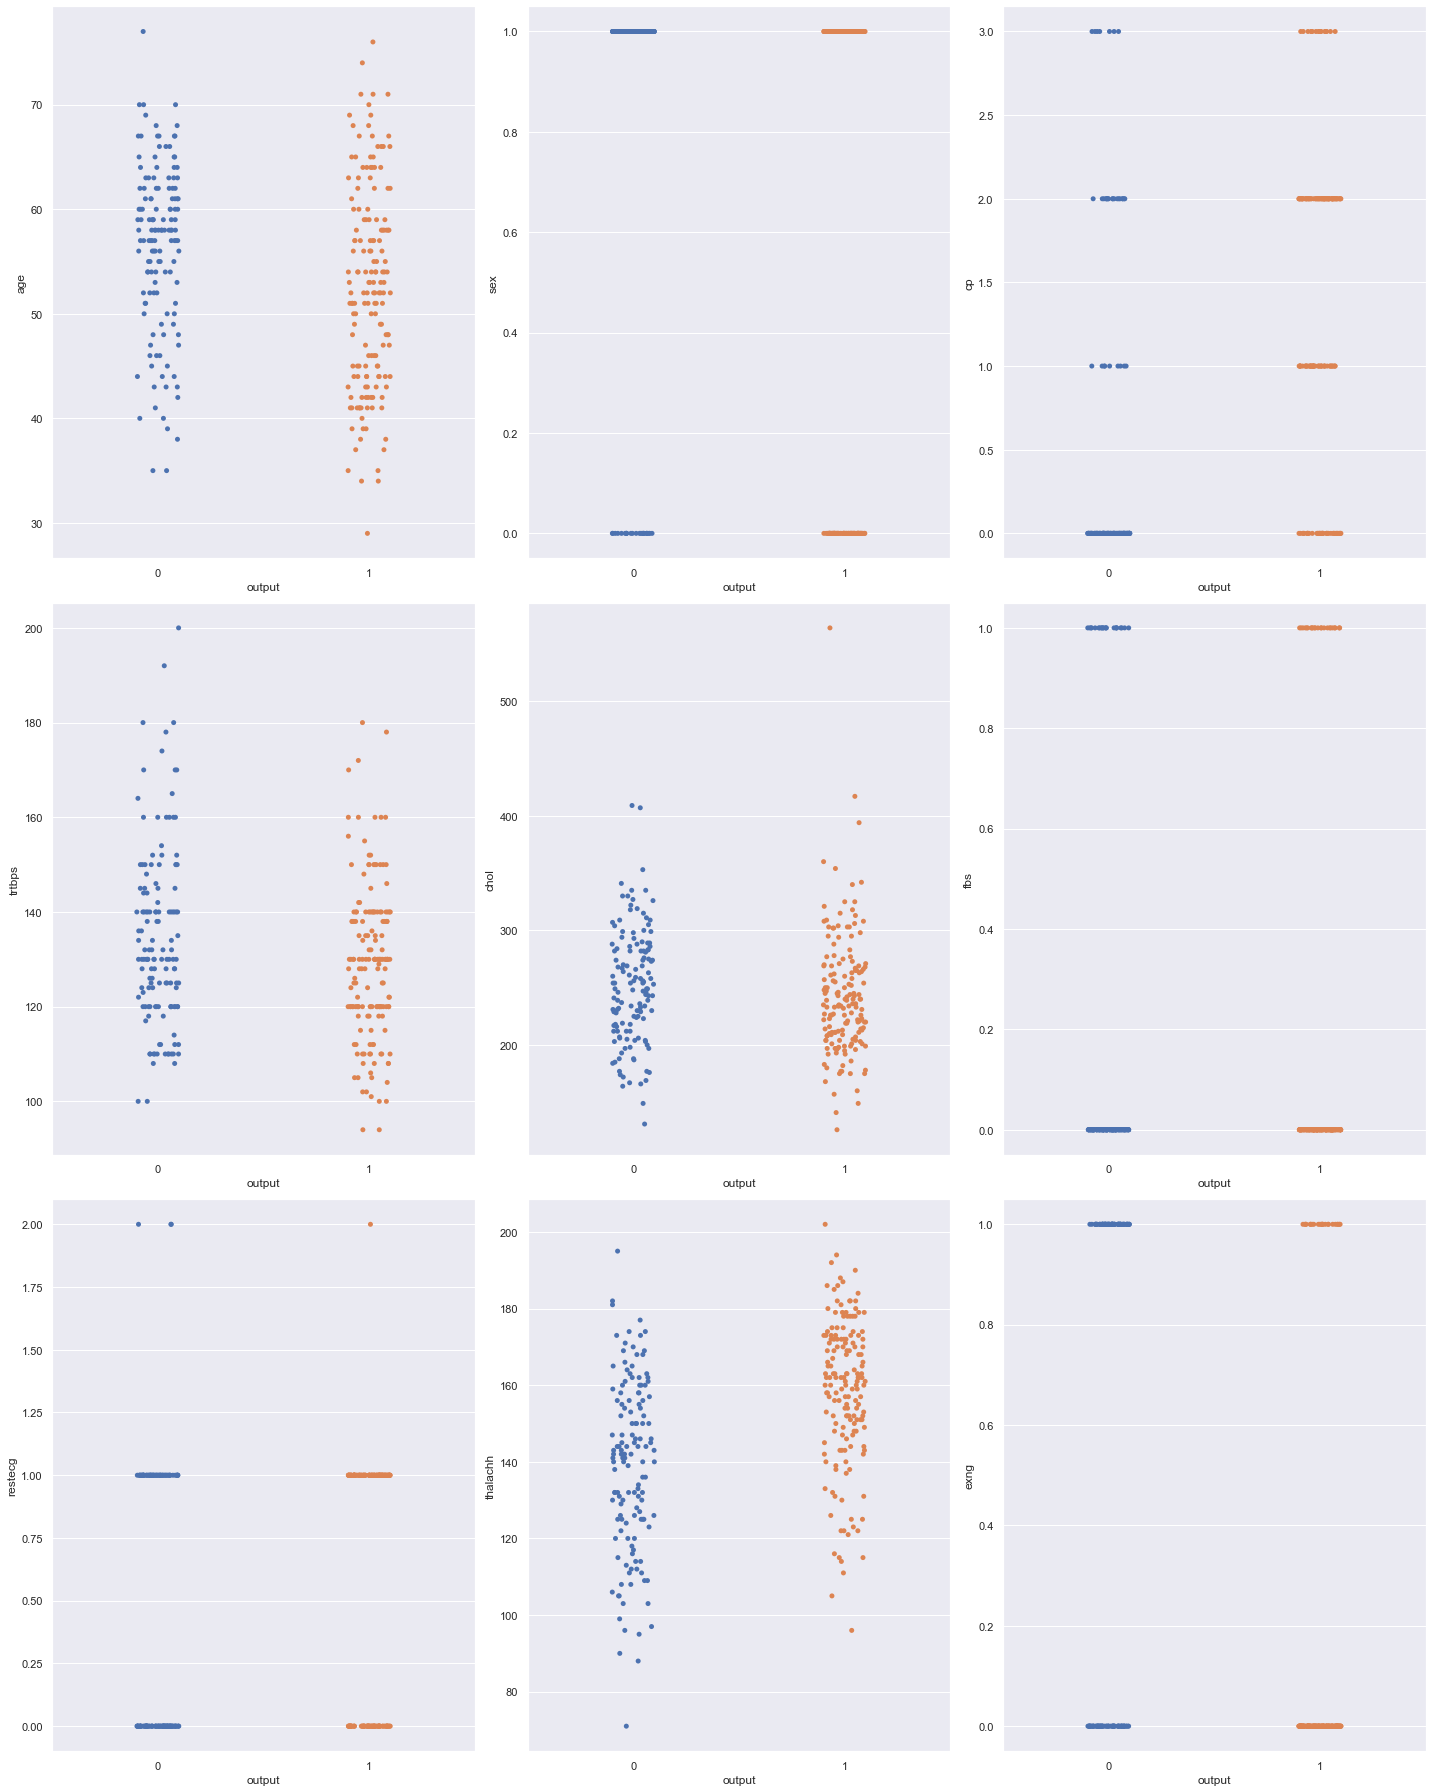

In [169]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(df['output'],df[column])
    plotnumber+=1
plt.tight_layout()

In [213]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


In [172]:
cat_col = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_col = ["age","trtbps","chol","thalachh","oldpeak"]

In [173]:
df1 =df

In [174]:
df1 = pd.get_dummies(df1,columns=cat_col,drop_first=True)

In [175]:
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,exng_1,caa_1,caa_2,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


In [176]:
X = df1.drop(['output'],axis=1)
y = df1['output']

In [178]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [182]:
## Scaling
scaler = StandardScaler()
### Lets scale the continous variable column
X[con_col] = scaler.fit_transform(X[con_col])

In [183]:
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [184]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=52)

In [187]:
X_test.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
94,-1.033002,-1.120770,-1.667094,-0.509323,-0.896862,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
76,-0.371269,-0.378302,-0.024428,0.715131,1.173608,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
6,0.180175,0.478391,0.922521,0.146634,0.224643,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
280,-1.363869,0.249940,1.328356,-1.077820,0.655990,1,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [188]:
###Lets start with using algorithm:Support Vector Machine
svm = SVC(kernel='sigmoid',C=1,random_state=42).fit(X_train,y_train)

In [189]:
svm

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [191]:
y_pred = svm.predict(X_test)

In [193]:
accuracy_score(y_test,y_pred)
### The accuracy score is 81.31%

0.8131868131868132

In [195]:
### Lets do hyper parameter tuning
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear','sigmoid','rbf'], 'gamma': [0.001, 0.0001,0.0005]}]

In [196]:
param_grid

[{'C': [1, 10, 100, 1000],
  'kernel': ['linear', 'sigmoid', 'rbf'],
  'gamma': [0.001, 0.0001, 0.0005]}]

In [197]:
### GridSearchCV
gridsearch = GridSearchCV(svm,param_grid)

In [198]:
gridsearch

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='sigmoid', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001, 0.0005],
                          'kernel': ['linear', 'sigmoid', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [199]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='sigmoid', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001, 0.0005],
                          'kernel': ['linear', 'sigmoid', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [200]:
gridsearch.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}

In [201]:
svm = SVC(kernel='linear',C=10,gamma=0.001,random_state=42).fit(X_train,y_train)

In [204]:
svm.score(X_train,y_train)

0.8820754716981132

In [205]:
y_pred = svm.predict(X_test)

In [206]:
accuracy_score(y_test,y_pred)
## Our accuracy is reduced after hyper paramter tuning.. we need to tweak the values

0.7802197802197802

In [207]:
### In meanwhile lets try to apply LogisticRegression Algorithm
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [209]:
y_pred = log_reg.predict(X_test)

In [211]:
accuracy = accuracy_score(y_test,y_pred)
accuracy
### Accuracy is 81.31%

0.8131868131868132

In [214]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[32,  9],
       [ 8, 42]], dtype=int64)

In [216]:
dtc = DecisionTreeClassifier()

In [217]:
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [219]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [220]:
y_pred = dtc.predict(X_test)

In [221]:
accuracy = accuracy_score(y_test,y_pred)
accuracy
### Accuracy is 79.12%

0.7912087912087912

In [222]:
### Random Forest Classifier
rf = RandomForestClassifier()

In [223]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [224]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [228]:
y_pred_rf = rf.predict(X_test)

In [229]:
accuracy = accuracy_score(y_test,y_pred_rf)
accuracy
### Accuracy is 79.12%

0.7912087912087912

In [230]:
### Gradient boosting Classifier without tuning
gbc = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

<IPython.core.display.Javascript object>

In [232]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=0.2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [234]:
y_pred = gbc.predict(X_test)

In [235]:
accuracy_score(y_test, y_pred)
### 81.31% Accuracy

0.8131868131868132